<a href="https://colab.research.google.com/github/henriqueborgo/Solved_Cases_Data_Expert_Course/blob/main/Classification_Chalenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio de classificação


Henrique Borgo
RID 55833

## Introdução

Você trabalha em uma plataforma de streaming e a diretoria está preocupada com o alto índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível prever se um usuário tem mais chance de deixar a plataforma antes que isso aconteça,e com base nessa informação tomar ações para reduzir o churn.
Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem mais chance de cancelar a sua assinatura na plataforma ou não. Para isso, a empresa forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.

Fonte dos dados:
https://www.notion.so/signed/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F75a740fb-4146-455a-8d13-6a24ba56d2c8%2Fstreaming_data.csv?table=block&id=7f01c93d-8cfd-46fb-9f2a-8f0bbd2fbaae&spaceId=6a055055-52ec-4ebb-a697-63027c951344&userId=3db31763-e1c5-4c6e-9c68-bc5887f86848&cache=v2

## Bibliotecas

In [ ]:
# Importando bibliotecas gerais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statistics import mean

In [ ]:
# Importando bibliotecas da modelagem

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, scale
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


---

---

## 1) Análise exploratória

### Carregando os dados

In [ ]:
# Carregando dataset

df = pd.read_csv('/content/streaming_data.csv')

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


### Descrição estatistica dos dados

In [ ]:
# Descrição estatistica do dataset

df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


### Tipos de dados

In [ ]:
# Descrição dos tipos de dados do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


### Quantidade valores nulos

In [ ]:
# Contagem de dados nulos por feature
for i in df.columns:
  nan_count = df[i].isnull().sum()
  nan_percent = (nan_count/len(df[i]))*100
  print(f"{i}: {nan_count}")
  print(f'Perc. de nulos: {nan_percent} %')
  print('--------')

Age: 11277
Perc. de nulos: 14.479225514868265 %
--------
Gender: 14516
Perc. de nulos: 18.637974423501618 %
--------
Time_on_platform: 21420
Perc. de nulos: 27.502439525448104 %
--------
Devices_connected: 25188
Perc. de nulos: 32.34040367726362 %
--------
Subscription_type: 25221
Perc. de nulos: 32.38277438241487 %
--------
Num_streaming_services: 68312
Perc. de nulos: 87.70992758461301 %
--------
Num_active_profiles: 0
Perc. de nulos: 0.0 %
--------
Avg_rating: 17270
Perc. de nulos: 22.1740023624878 %
--------
Churned: 16736
Perc. de nulos: 21.488367315494838 %
--------
User_id: 0
Perc. de nulos: 0.0 %
--------


## 2) Tratamento dos Dados

### Fillna

In [ ]:
# Substituir colunas Nan por 0
# Colunas: Time_in_platform, Num_streaming_services, Churned, Avg_rating, Decices_connected

fillna_columns = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']

for i in fillna_columns:
  df[i] = df[i].fillna(0)


In [ ]:
# Verificando a transformação de nulos

for i in fillna_columns:
  nan_count = df[i].isnull().sum()
  nan_percent = (nan_count/len(df[i]))*100
  print(f"{i}: {nan_count}")
  print(f'Perc. de nulos: {nan_percent} %')
  print('--------')

Time_on_platform: 0
Perc. de nulos: 0.0 %
--------
Num_streaming_services: 0
Perc. de nulos: 0.0 %
--------
Churned: 0
Perc. de nulos: 0.0 %
--------
Avg_rating: 0
Perc. de nulos: 0.0 %
--------
Devices_connected: 0
Perc. de nulos: 0.0 %
--------


### Dropna

In [ ]:
# Removendo as linhas nulas
# Colunas: Gender, Avg_rating, Devices_connected

dropna_columns = ['Gender', 'Subscription_type', 'Age']
df = df.dropna(subset=dropna_columns)

In [ ]:
# Verificando a transformação de nulos

for i in dropna_columns:
  nan_count = df[i].isnull().sum()
  nan_percent = (nan_count/len(df[i]))*100
  print(f"{i}: {nan_count}")
  print(f'Perc. de nulos: {nan_percent} %')
  print('--------')

Gender: 0
Perc. de nulos: 0.0 %
--------
Subscription_type: 0
Perc. de nulos: 0.0 %
--------
Age: 0
Perc. de nulos: 0.0 %
--------


### Churned para 'No' e 'Yes'

In [ ]:
# Transformando conteudo da coluna Churned de 0 para 'No' e 1 para 'Yes'

# df['Churned'] = df['Churned'].replace({0:'No',1:'Yes'})
# df['Churned']

In [ ]:
# df['Churned'] = df['Churned'].astype('category')
df['Churned'] = df['Churned'].astype('int')

<ipython-input-328-59380620cb32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'] = df['Churned'].astype('int')


### Float para Int

In [ ]:
# Transformando valores float das colunas para int

for i in df.columns:
  try:
    df[i] = pd.to_numeric(df[i]).astype(int)
  except ValueError:
    continue

<ipython-input-329-6ec72ede116e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = pd.to_numeric(df[i]).astype(int)


In [ ]:
# Verificado a transformação de floats para int
df.dtypes

Age                        int64
Gender                    object
Time_on_platform           int64
Devices_connected          int64
Subscription_type         object
Num_streaming_services     int64
Num_active_profiles        int64
Avg_rating                 int64
Churned                    int64
User_id                   object
dtype: object

### Drop User_id column

In [ ]:
df = df.drop('User_id', axis = 1)
df

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
0,49,Male,4700,3,Basic,0,3,0,0
1,69,Female,6107,2,Standard,0,1,2,0
2,44,Male,6374,3,Premium,1,1,1,1
3,26,Male,0,5,Basic,0,2,0,0
5,54,Male,3024,2,Basic,0,1,0,0
...,...,...,...,...,...,...,...,...,...
77879,45,Male,0,0,Basic,0,5,2,0
77880,47,Female,6176,0,Premium,0,2,4,0
77881,64,Female,0,5,Premium,0,1,4,1
77882,58,Male,1314,5,Standard,0,4,0,0


### Correlação

<ipython-input-332-fc3ce12e94ce>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_lr = df.corr()


<Axes: >

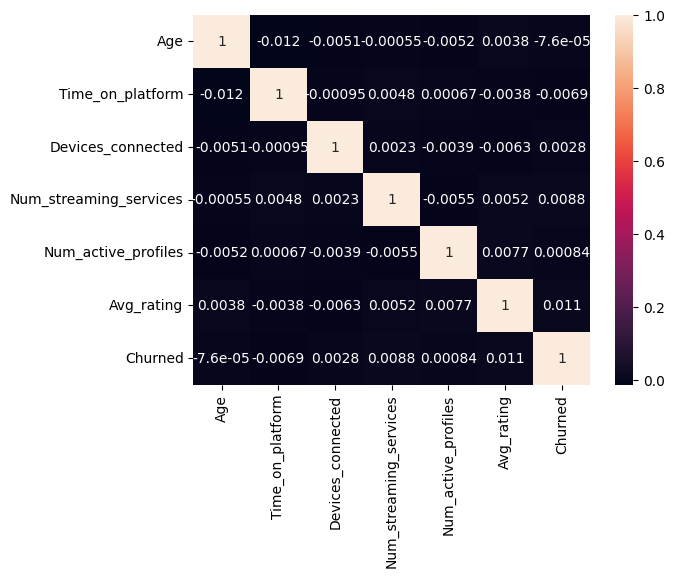

In [ ]:
# Extraindo a correlação entre features do dataset

corr_lr = df.corr()
sns.heatmap(corr_lr, annot=True)

## 3) Modelagem - Regr. Logistica

### Get_dummies

In [ ]:
df

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
0,49,Male,4700,3,Basic,0,3,0,0
1,69,Female,6107,2,Standard,0,1,2,0
2,44,Male,6374,3,Premium,1,1,1,1
3,26,Male,0,5,Basic,0,2,0,0
5,54,Male,3024,2,Basic,0,1,0,0
...,...,...,...,...,...,...,...,...,...
77879,45,Male,0,0,Basic,0,5,2,0
77880,47,Female,6176,0,Premium,0,2,4,0
77881,64,Female,0,5,Premium,0,1,4,1
77882,58,Male,1314,5,Standard,0,4,0,0


In [ ]:
# Aplicando get_dummies
# Colunas Gender e Subscription_type

cat_columns = ['Gender','Subscription_type']

df = pd.get_dummies(df,columns = cat_columns)
df

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,49,4700,3,0,3,0,0,0,1,1,0,0
1,69,6107,2,0,1,2,0,1,0,0,0,1
2,44,6374,3,1,1,1,1,0,1,0,1,0
3,26,0,5,0,2,0,0,0,1,1,0,0
5,54,3024,2,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77879,45,0,0,0,5,2,0,0,1,1,0,0
77880,47,6176,0,0,2,4,0,1,0,0,1,0
77881,64,0,5,0,1,4,1,1,0,0,1,0
77882,58,1314,5,0,4,0,0,0,1,0,0,1


### Normalização dos dados

In [ ]:
# Selecionando colunas a normalizar

ord_columns = ['Age','Time_on_platform']

In [ ]:
# Verificando outliers

df.describe(percentiles = [0.1,0.5,0.6,0.7,0.8,0.9])

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
count,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000
mean,43.473422,3170.231576,2.039628,0.309434,2.993455,1.951006,0.193236,0.497029,0.502971,0.332302,0.334767,0.332932
std,15.092181,2909.245246,1.820622,0.909600,1.412968,1.435179,0.394842,0.499998,0.499998,0.471045,0.471915,0.471269
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,23.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,2708.000000,2.000000,0.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
60%,49.000000,3895.400000,3.000000,0.000000,3.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
70%,54.000000,5137.800000,3.000000,0.000000,4.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
80%,59.000000,6353.200000,4.000000,0.000000,4.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90%,64.000000,7545.000000,5.000000,1.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


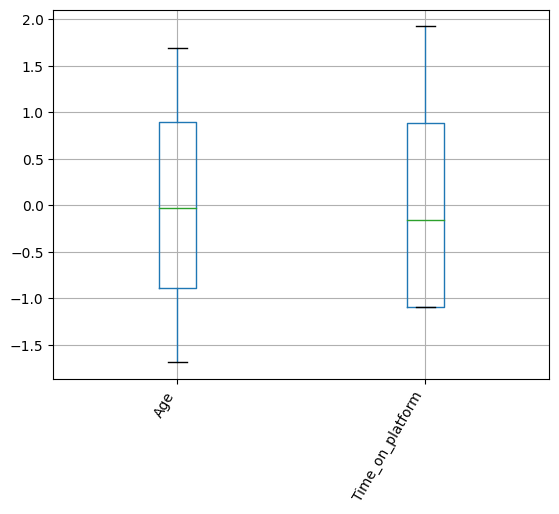

In [ ]:
df[ord_columns].apply(scale).boxplot()
plt.xticks(rotation=60, ha= 'right')
plt.show()

<ipython-input-338-42554622a924>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(distr_age)


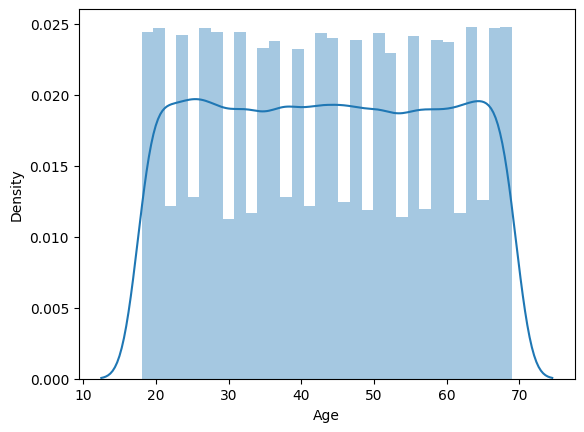

In [ ]:
# Verificando destribuição dos dados de Age

distr_age = df['Age']

ax = sns.distplot(distr_age)

<ipython-input-339-b09b56e1cb72>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(distr_age)


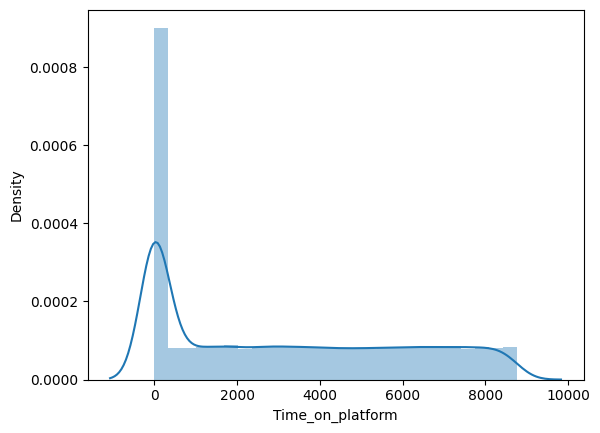

In [ ]:
# Verificando destribuição dos dados de Time_on_platform

distr_age = df['Time_on_platform']

ax = sns.distplot(distr_age)

In [ ]:
# Utilizando MinMaxScaler para normalização dos dados de Age e Time_on_platform
# Porque: Dados não apresentam uma destribuição Gaussiana
# Devices_connected, Num_streaming_services_, Num_active_profiles, Avg_rating não serão normalizados para manter a natureza ordinal

scaler = MinMaxScaler()

df[ord_columns] = scaler.fit_transform(df[ord_columns])

print('Dataset normalizado: ')
display(df.head())

print ('\nDataset_stats: ')
display(df.describe())

Dataset normalizado: 


,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,0.607843,0.536591,3,0,3,0,0,0,1,1,0,0
1,1.000000,0.697226,2,0,1,2,0,1,0,0,0,1
2,0.509804,0.727709,3,1,1,1,1,0,1,0,1,0
3,0.156863,0.000000,5,0,2,0,0,0,1,1,0,0
5,0.705882,0.345245,2,0,1,0,0,0,1,1,0,0



Dataset_stats: 


,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
count,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000
mean,0.499479,0.361940,2.039628,0.309434,2.993455,1.951006,0.193236,0.497029,0.502971,0.332302,0.334767,0.332932
std,0.295925,0.332144,1.820622,0.909600,1.412968,1.435179,0.394842,0.499998,0.499998,0.471045,0.471915,0.471269
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235294,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.490196,0.309168,2.000000,0.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.764706,0.655440,4.000000,0.000000,4.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Train_test_split

In [ ]:
# Separando as variáveis explicativas das variáveis dependentes

X_features = df.drop(columns = ['Churned'])
y_target = df['Churned']

In [ ]:
# Aplicando train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state = 7)

In [ ]:
# Verificando as divisões de treino e teste

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (29212, 11)
X_test shape: (7303, 11)
y_train shape: (29212,)
y_test shape: (7303,)


### Treinar modelo

In [ ]:
# Treinar Regressão Logistica

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prevendo valores para target

y_pred = lr.predict(X_test)

### ConfusionMatrix

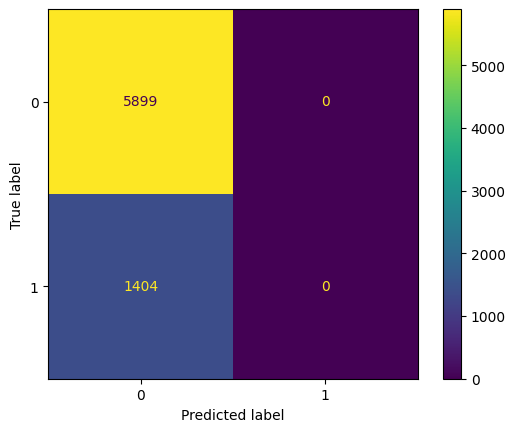

In [ ]:
# Criando e exibindo a matriz de confusão

cm = confusion_matrix(y_test, y_pred)

cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

plt.show()

### Métricas

In [ ]:
# Exibindo o relatório de métricas de classificação

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      5899
           1       0.00      0.00      0.00      1404

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Stratified KFold

In [ ]:
# Construindo modelo de cross validation para verificar distribuição dos dados

model = LogisticRegression()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

In [ ]:
# Rodando cross validation model (StratifiedKFold) com 10 folds

for train_index, test_index in skf.split(X_features,y_target):
  X_train_fold, X_test_fold = X_features.iloc[train_index], X_features.iloc[test_index]
  y_train_fold, y_test_fold = y_target.iloc[train_index], y_target.iloc[test_index]
  model.fit(X_train_fold, y_train_fold)
  lst_accu_stratified.append(model.score(X_test_fold,y_test_fold))
print(lst_accu_stratified)

[0.8066812705366923, 0.8066812705366923, 0.8066812705366923, 0.8066812705366923, 0.8066812705366923, 0.8069022185702547, 0.8069022185702547, 0.8069022185702547, 0.8069022185702547, 0.806628321007943]


In [ ]:
# Extraindo resultados das métricas

print('Maximum Accuracy', max(lst_accu_stratified)*100)
print('Minimum Accuracy', min(lst_accu_stratified)*100)
print('Mean Accuracy', mean(lst_accu_stratified)*100)

Maximum Accuracy 80.69022185702546
Minimum Accuracy 80.6628321007943
Mean Accuracy 80.67643547972423


No cross-validation dos dados treinados pelo modelo de Logistic Regression, o mesmo apresentou resultados semelhantes aos treinos anteriores, ou seja, não indica problemas de balanceamento no dataset

## 4) Modelagem - Tunning

### Fit do modelo

In [ ]:
# Escolhendo hiperparâmetros e definindo otimizador

parameters = {'penalty': [None,'l2'],
              'class_weight': [None,'balanced'],
              'random_state':[5,6,7],
              'solver':['sag','saga']}

random_search = RandomizedSearchCV(lr, parameters, scoring = 'accuracy', n_jobs = -1, verbose=3, n_iter=10)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'penalty': [None, 'l2'],
                                        'random_state': [5, 6, 7],
                                        'solver': ['sag', 'saga']},
                   scoring='accuracy', verbose=3)

#### Melhores parâmetros

In [ ]:
# Extraindo melhores parâmetros

random_search.best_params_

{'solver': 'sag', 'random_state': 7, 'penalty': 'l2', 'class_weight': None}

In [ ]:
# Criando uma tabela com as os melhores resultados do RandomizedSearchCV

results_random = pd.DataFrame(random_search.cv_results_)

# Rankeando resultados

results_random.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_random_state,param_penalty,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,1.840220,0.287397,0.004340,0.002480,sag,7,l2,None,"{'solver': 'sag', 'random_state': 7, 'penalty'...",0.806435,0.806435,0.806573,0.806573,0.806573,0.806518,0.000068,1
6,0.450029,0.054600,0.004556,0.002923,sag,5,None,None,"{'solver': 'sag', 'random_state': 5, 'penalty'...",0.806435,0.806435,0.806573,0.806573,0.806573,0.806518,0.000068,1
1,1.475864,0.298940,0.003165,0.000096,saga,7,l2,balanced,"{'solver': 'saga', 'random_state': 7, 'penalty...",0.539962,0.532945,0.507532,0.516604,0.517460,0.522901,0.011811,3
4,1.636693,0.156082,0.004461,0.002638,sag,6,l2,balanced,"{'solver': 'sag', 'random_state': 6, 'penalty'...",0.539962,0.532945,0.507532,0.516604,0.517460,0.522901,0.011811,3
8,2.060582,0.806312,0.008457,0.006298,saga,5,l2,balanced,"{'solver': 'saga', 'random_state': 5, 'penalty...",0.539962,0.532945,0.507532,0.516604,0.517460,0.522901,0.011811,3
9,0.619584,0.110482,0.003237,0.000499,sag,5,l2,balanced,"{'solver': 'sag', 'random_state': 5, 'penalty'...",0.539962,0.532945,0.507532,0.516604,0.517460,0.522901,0.011811,3
2,0.501727,0.115894,0.005374,0.004218,saga,7,None,balanced,"{'solver': 'saga', 'random_state': 7, 'penalty...",0.539962,0.532774,0.507703,0.516604,0.517289,0.522866,0.011753,7
5,0.420554,0.090044,0.007692,0.006265,saga,5,None,balanced,"{'solver': 'saga', 'random_state': 5, 'penalty...",0.539962,0.532774,0.507703,0.516604,0.517289,0.522866,0.011753,7
0,0.262436,0.039683,0.003069,0.000088,saga,6,None,balanced,"{'solver': 'saga', 'random_state': 6, 'penalty...",0.539962,0.532774,0.507703,0.516604,0.517117,0.522832,0.011770,9
7,1.049274,0.175606,0.006006,0.003509,sag,5,None,balanced,"{'solver': 'sag', 'random_state': 5, 'penalty'...",0.539962,0.532774,0.507703,0.516604,0.517117,0.522832,0.011770,9


### ConfusionMatrix

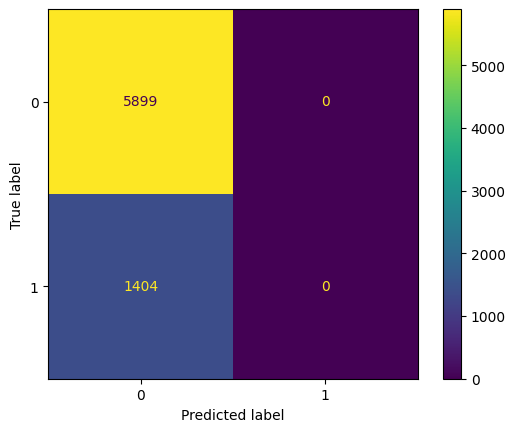

In [ ]:
# Criando e exibindo a matriz de confusão

cm = confusion_matrix(y_test, y_pred)

cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

plt.show()

### Métricas Tunning

In [ ]:
# Executando o modelo otimizado e avaliando métricas

y_pred = random_search.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      5899
           1       0.00      0.00      0.00      1404

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5) Modelagem - Random Forest

### Atribuindo modelo

In [ ]:
# Atribuindo o modelo

rf = RandomForestClassifier()

### RandomizedSearch

In [ ]:
# Escolhendo hiperparâmetros e definindo otimizador

parameters = {'bootstrap': [True,False],
              'max_depth': [None],
              'min_samples_split':[2,4],
              'max_features': ['log2',None],
              'n_estimators': [100,200]}

random_search = RandomizedSearchCV(rf, parameters, scoring = 'accuracy', n_jobs = -1, verbose=3, n_iter=10)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None],
                                        'max_features': ['log2', None],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [100, 200]},
                   scoring='accuracy', verbose=3)

#### Melhores parâmetros

In [ ]:
# Extraindo melhores parâmetros

random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'max_features': None,
 'max_depth': None,
 'bootstrap': True}

In [ ]:
# Criando uma tabela com as os melhores resultados do RandomizedSearchCV

results_random = pd.DataFrame(random_search.cv_results_)

# Rankeando resultados

results_random.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,22.609844,2.331635,0.456943,0.161341,200,4,None,None,True,"{'n_estimators': 200, 'min_samples_split': 4, ...",0.829711,0.834332,0.831222,0.834646,0.831907,0.832363,0.001878,1
3,9.684952,0.510109,0.140203,0.005403,100,4,None,None,True,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.828684,0.834161,0.828312,0.835159,0.831222,0.831508,0.002780,2
9,9.164821,1.012972,0.192204,0.087984,100,2,None,None,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.827999,0.829711,0.829168,0.834988,0.829339,0.830241,0.002442,3
6,6.065965,0.507830,0.283414,0.004917,200,4,log2,None,True,"{'n_estimators': 200, 'min_samples_split': 4, ...",0.826801,0.830224,0.829682,0.828655,0.824375,0.827947,0.002134,4
1,3.025628,0.384994,0.170092,0.035357,100,2,log2,None,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.823721,0.826459,0.826258,0.828826,0.822663,0.825585,0.002179,5
5,4.332176,0.441300,0.176628,0.005248,100,2,log2,None,False,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.810543,0.812425,0.813249,0.814789,0.810852,0.812372,0.001567,6
7,9.032222,0.430052,0.344417,0.014086,200,2,log2,None,False,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.809002,0.813623,0.811708,0.814618,0.809825,0.811755,0.002144,7
4,15.813954,0.627313,0.152243,0.004634,100,4,None,None,False,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.734383,0.746705,0.736392,0.739473,0.731428,0.737676,0.005221,8
2,31.978522,1.228472,0.327653,0.050645,200,4,None,None,False,"{'n_estimators': 200, 'min_samples_split': 4, ...",0.732500,0.748930,0.733311,0.737761,0.730058,0.736512,0.006690,9
8,31.522111,1.250102,0.321958,0.006482,200,2,None,None,False,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.732329,0.745165,0.736049,0.732283,0.729887,0.735143,0.005385,10


#### Métricas Tunning

In [ ]:
# Executando o modelo otimizado e avaliando métricas

y_pred = random_search.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      5899
           1       0.78      0.24      0.37      1404

    accuracy                           0.84      7303
   macro avg       0.81      0.61      0.64      7303
weighted avg       0.83      0.84      0.81      7303



#### ConfusionMatrix

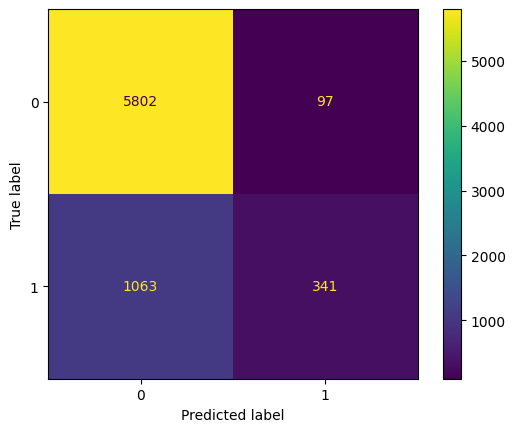

In [ ]:
# Criando e exibindo a matriz de confusão

cm = confusion_matrix(y_test, y_pred)

cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

plt.show()

### GridSearchCV

In [ ]:
# Montando otimização em GridSearchCV

rfc_gs = GridSearchCV(rf, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1,verbose=3)
rfc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None],
                         'max_features': ['log2', None],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=3)

#### Melhores parâmetros

In [ ]:
# Extraindo melhores parâmetros

rfc_gs.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': None,
 'min_samples_split': 4,
 'n_estimators': 200}

In [ ]:
# Criando uma tabela com as os melhores resultados do RandomizedSearchCV

results_GSCV = pd.DataFrame(random_search.cv_results_)

# Rankeando resultados

results_GSCV.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,22.609844,2.331635,0.456943,0.161341,200,4,None,None,True,"{'n_estimators': 200, 'min_samples_split': 4, ...",0.829711,0.834332,0.831222,0.834646,0.831907,0.832363,0.001878,1
3,9.684952,0.510109,0.140203,0.005403,100,4,None,None,True,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.828684,0.834161,0.828312,0.835159,0.831222,0.831508,0.002780,2
9,9.164821,1.012972,0.192204,0.087984,100,2,None,None,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.827999,0.829711,0.829168,0.834988,0.829339,0.830241,0.002442,3
6,6.065965,0.507830,0.283414,0.004917,200,4,log2,None,True,"{'n_estimators': 200, 'min_samples_split': 4, ...",0.826801,0.830224,0.829682,0.828655,0.824375,0.827947,0.002134,4
1,3.025628,0.384994,0.170092,0.035357,100,2,log2,None,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.823721,0.826459,0.826258,0.828826,0.822663,0.825585,0.002179,5
5,4.332176,0.441300,0.176628,0.005248,100,2,log2,None,False,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.810543,0.812425,0.813249,0.814789,0.810852,0.812372,0.001567,6
7,9.032222,0.430052,0.344417,0.014086,200,2,log2,None,False,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.809002,0.813623,0.811708,0.814618,0.809825,0.811755,0.002144,7
4,15.813954,0.627313,0.152243,0.004634,100,4,None,None,False,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.734383,0.746705,0.736392,0.739473,0.731428,0.737676,0.005221,8
2,31.978522,1.228472,0.327653,0.050645,200,4,None,None,False,"{'n_estimators': 200, 'min_samples_split': 4, ...",0.732500,0.748930,0.733311,0.737761,0.730058,0.736512,0.006690,9
8,31.522111,1.250102,0.321958,0.006482,200,2,None,None,False,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.732329,0.745165,0.736049,0.732283,0.729887,0.735143,0.005385,10


#### Métricas Tunning

In [ ]:
# Executando o modelo otimizado e avaliando métricas

y_pred = rfc_gs.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      5899
           1       0.78      0.24      0.37      1404

    accuracy                           0.84      7303
   macro avg       0.81      0.61      0.64      7303
weighted avg       0.83      0.84      0.81      7303



####ConfusionMatriz

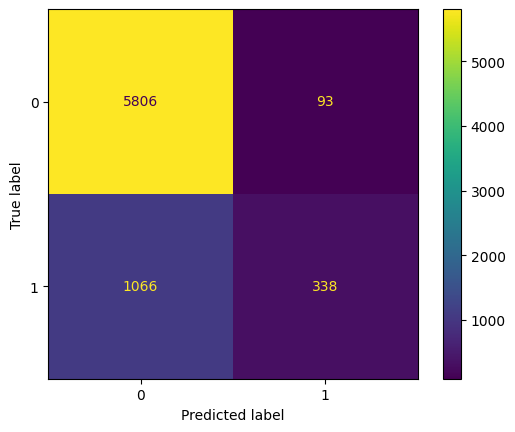

In [ ]:
# Criando e exibindo a matriz de confusão

cm = confusion_matrix(y_test, y_pred)

cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

plt.show()

Conforme resultados do report do modelo de classificação e da Matriz de Confusão, a escolha para o melhor modelo dentre os avaliados é o RandomForestClassifier, trazendo uma precisão aproximada de 84% para os resultados negativo e 78% para os resultados positivos.